In [1]:
from os import listdir, makedirs, remove
from os.path import isfile, join
from collections import defaultdict,OrderedDict
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

In [2]:
months = ['ukraine-russia-master/2022-02', 'ukraine-russia-master/2022-03', 'ukraine-russia-master/2022-04',
         'ukraine-russia-master/2022-05', 'ukraine-russia-master/2022-06', 'ukraine-russia-master/2022-07',
         'ukraine-russia-master/2022-08', 'ukraine-russia-master/2022-09', 'ukraine-russia-master/2022-10']

In [3]:
tweets_per_day = defaultdict(int)
tweets_per_month = defaultdict(int)
for month in tqdm(months):
    path = month
    month_num = month[22:]
    files = [f for f in listdir(path) if (isfile(join(path, f)))]
    for file in files:
        with open(join(path, file), 'r') as fp:
            date = file[20:-7]
            x = len(fp.readlines())
            tweets_per_day[date] += x
            tweets_per_month[month_num] += x

100%|█████████████████████████████████████████████| 9/9 [00:28<00:00,  3.19s/it]


In [4]:
tweets_per_day_ordered = OrderedDict(sorted(tweets_per_day.items()))
tweets_per_month_ordered = OrderedDict(sorted(tweets_per_month.items()))

In [5]:
tweets_per_month_ordered

OrderedDict([('2022-02', 28908101),
             ('2022-03', 125508593),
             ('2022-04', 81322963),
             ('2022-05', 58093079),
             ('2022-06', 41015679),
             ('2022-07', 35406947),
             ('2022-08', 35457520),
             ('2022-09', 46660730),
             ('2022-10', 2114833)])

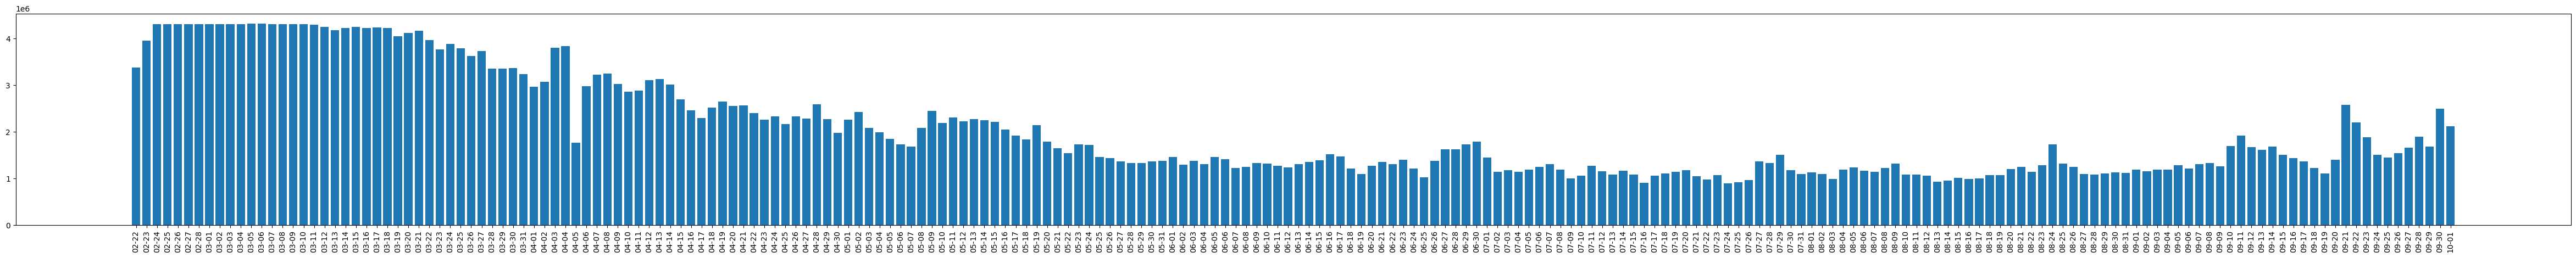

In [25]:
names = list(tweets_per_day_ordered.keys())
values = list(tweets_per_day_ordered.values())
plt.figure(figsize=(60,5))
plt.bar(range(len(tweets_per_day_ordered)), values, tick_label=names)
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, '#tweets related to the conflict on Twitter (in thousands)')

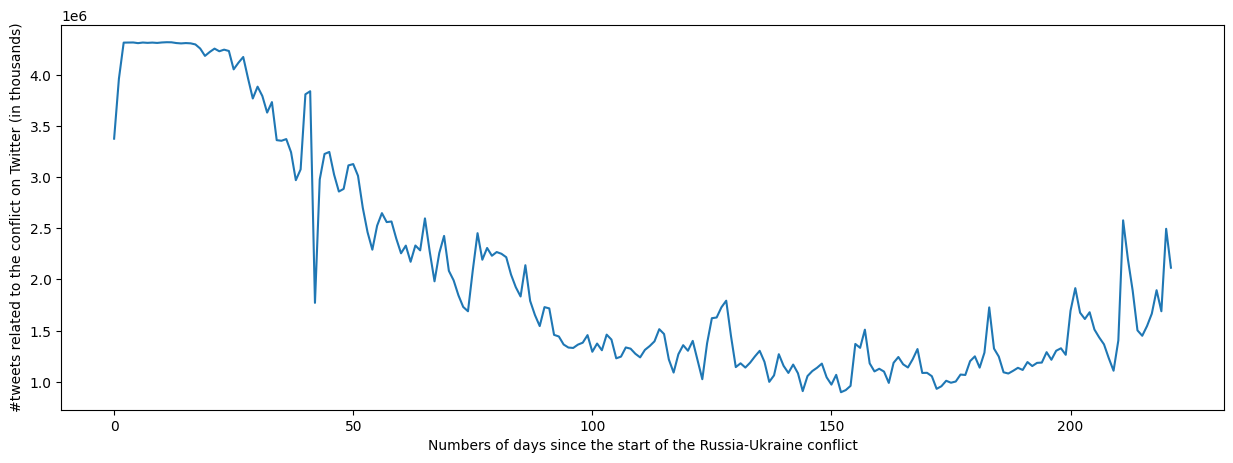

In [26]:
plt.figure(figsize=(15,5))
plt.plot(values)
plt.xlabel("Numbers of days since the start of the Russia-Ukraine conflict")
plt.ylabel("#tweets related to the conflict on Twitter (in thousands)")

In [14]:
sum(tweets_per_day_ordered.values())

454488445

In [15]:
454488445/10000000

45.4488445

In [16]:
total_tweets_we_need = 10000000
fraction_we_need_to_sample = defaultdict(int)
for day, num_tweets in tqdm(tweets_per_day_ordered.items()):
    fraction_we_need_to_sample[day] = (num_tweets*10000000)//454488445

100%|█████████████████████████████████████| 222/222 [00:00<00:00, 438800.89it/s]


In [17]:
np.save("fraction_we_need_to_sample.npy", fraction_we_need_to_sample)

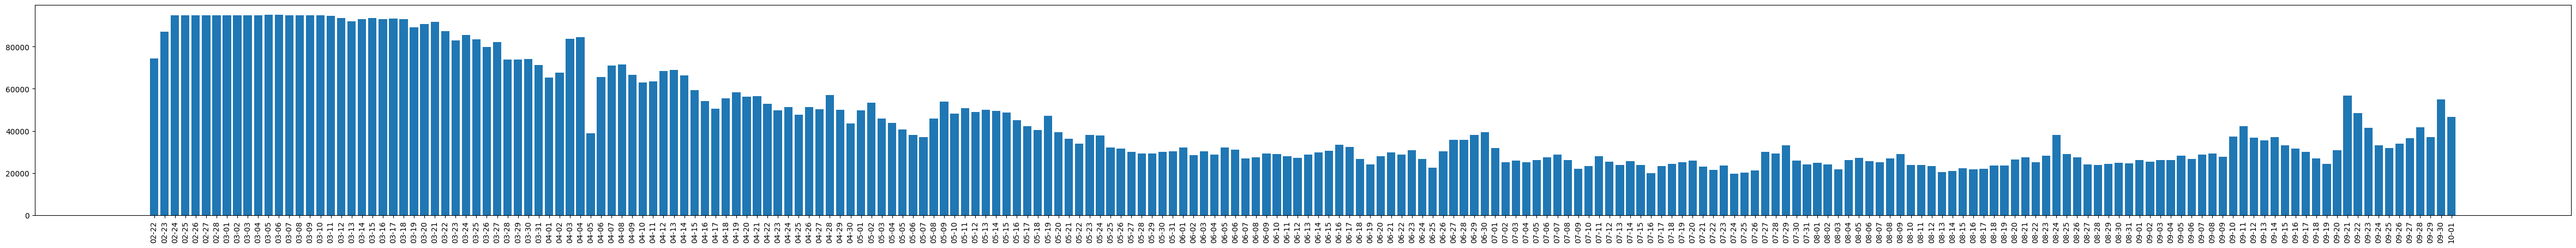

In [18]:
names = list(fraction_we_need_to_sample.keys())
values = list(fraction_we_need_to_sample.values())
plt.figure(figsize=(60,5))
plt.bar(range(len(fraction_we_need_to_sample)), values, tick_label=names)
plt.xticks(rotation=90)
plt.show()

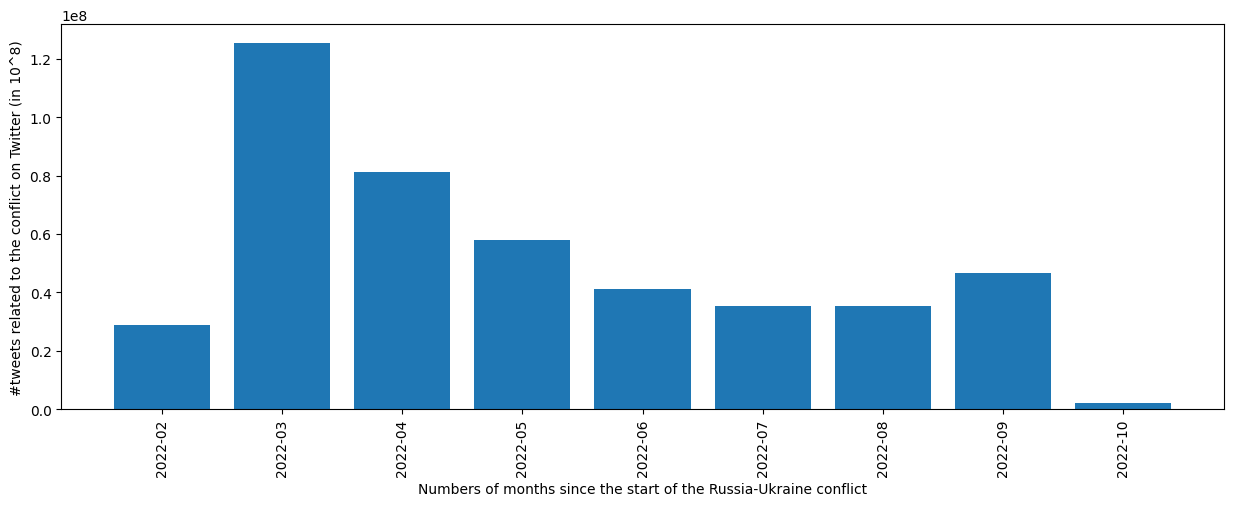

In [27]:
names = list(tweets_per_month_ordered.keys())
values = list(tweets_per_month_ordered.values())
plt.figure(figsize=(15,5))
plt.bar(range(len(tweets_per_month_ordered)), values, tick_label=names)
plt.xticks(rotation=90)
plt.xlabel("Numbers of months since the start of the Russia-Ukraine conflict")
plt.ylabel("#tweets related to the conflict on Twitter (in 10^8)")
plt.show()

Text(0, 0.5, '#tweets related to the conflict on Twitter (in thousands)')

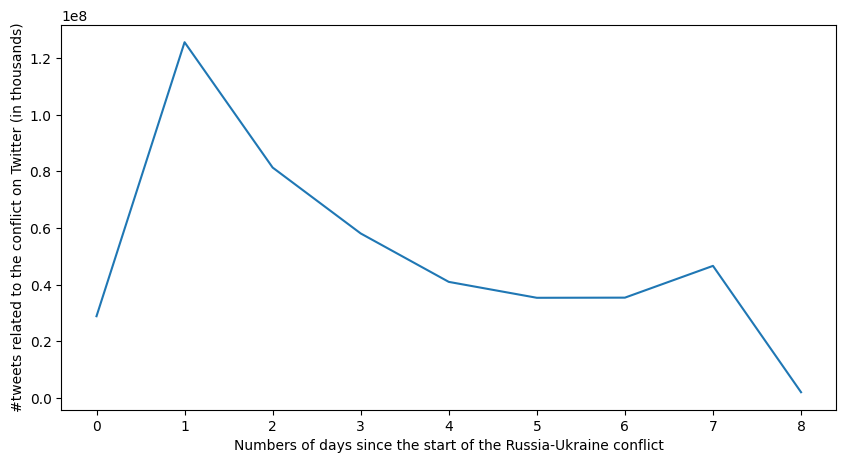

In [20]:
plt.figure(figsize=(10,5))
plt.plot(values)
plt.xlabel("Numbers of days since the start of the Russia-Ukraine conflict")
plt.ylabel("#tweets related to the conflict on Twitter (in thousands)")

In [28]:
import glob
from tqdm import tqdm
import numpy as np

In [29]:
files = glob.glob('sampled_tweets/*[0-9].npy')
files.sort()

In [30]:
len(files)

222

In [35]:
total_tweet_count = 0
distribution_of_tweets = defaultdict(int)
for file in tqdm(files):
    tweets = np.load(file, allow_pickle=True).tolist()
    for tweet in tweets:
        if 'lang' in tweet:
            distribution_of_tweets[tweet['lang']] += 1
    total_tweet_count += len(tweets)

100%|█████████████████████████████████████████| 222/222 [11:48<00:00,  3.19s/it]


In [36]:
distribution_of_tweets_ordered = dict(sorted(distribution_of_tweets.items(), key=lambda item: -item[1]))

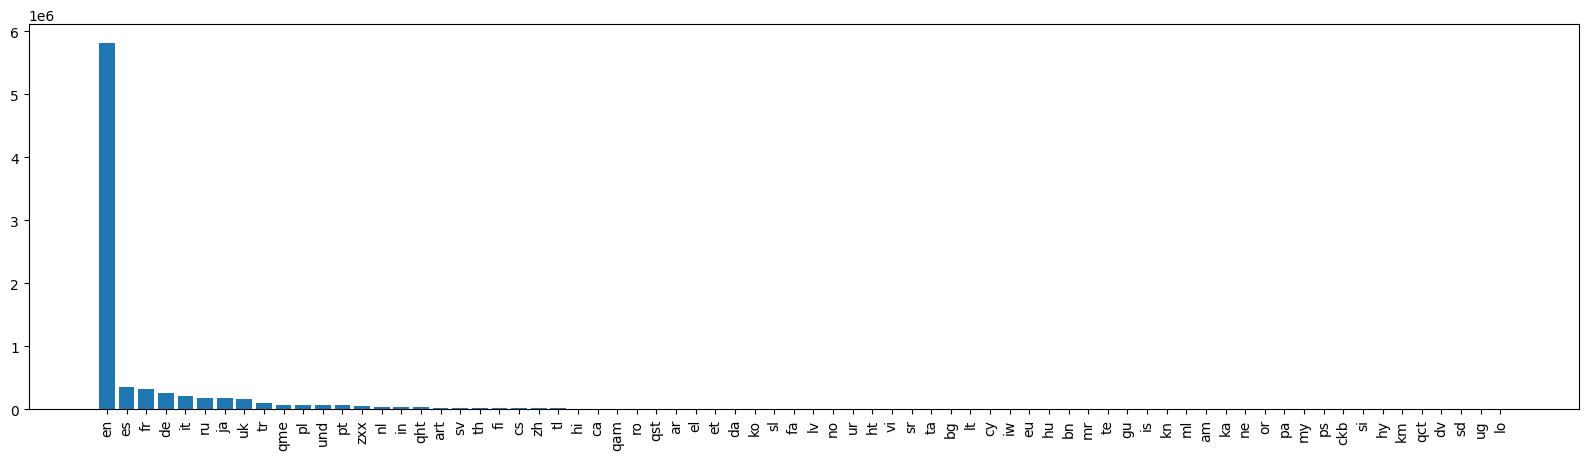

In [37]:
names = list(distribution_of_tweets_ordered.keys())
values = list(distribution_of_tweets_ordered.values())
plt.figure(figsize=(20,5))
plt.bar(range(len(distribution_of_tweets_ordered)), values, tick_label=names)
plt.xticks(rotation=90)
plt.show()

In [39]:
distribution_of_tweets_ordered['en']

5822196

In [40]:
distribution_of_tweets_ordered['es']

349925

In [41]:
distribution_of_tweets_ordered['fr']

321025

In [42]:
distribution_of_tweets_ordered['de']

266100

In [43]:
distribution_of_tweets_ordered['it']

218251

In [65]:
sum(distribution_of_tweets_ordered.values()) - 5822196 - 349925 - 321025

1775911

In [58]:
1509811*100/sum(distribution_of_tweets_ordered.values())

18.258563219481978

([<matplotlib.patches.Wedge at 0x15fa21910>,
 [Text(-0.7775851192963504, 1.0418067873885641, 'English (70%)'),
  Text(-0.17035067042978913, -1.0867293357060541, 'French (4%)'),
  Text(0.10918006383155035, -1.0945682772955458, 'Spanish (4%)'),
  Text(0.858979066447349, -0.687135331215941, 'Others (22%)')])

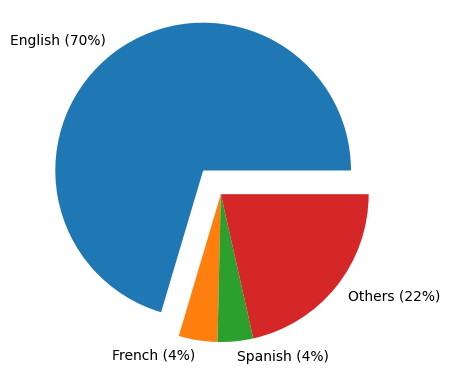

In [67]:
val = np.array([5822196, 349925, 321025, 1775911])
mylabels = ["English (70%)", "French (4%)", "Spanish (4%)", "Others (22%)"]
myexplode = [0.2, 0, 0, 0]
plt.pie(val, labels = mylabels, explode = myexplode)

In [39]:
distribution_of_tweets_ordered['en']/total_tweet_count

0.705795044180088

In [40]:
total_tweet_count

7801252

In [43]:
7801252*0.705795044180088

5506085.0

In [ ]:
5,446,781